# Shivam Chauhan week 2 assignment: PCA on Titanic Dataset 

In [58]:
#loading the libraries 
import pandas as pd
import os
from matplotlib import pyplot as plt


In [59]:
#loading the files
os.getcwd()
os.chdir("C:/Users\Shivam\OneDrive - Northeastern University\STUDY\EAI 6000 - FAI\Week 1 - logistic")
os.getcwd()
df = pd.read_csv("test_data.csv")

In [60]:
#Removing the unique ID which are column 1 and 2. 
df.drop(df.columns[:2], axis=1, inplace = True)
df.head(5)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


# PCA #

First step is to Converting the data into standard normal distribution. However, our data is already distributed normally. 

In [61]:
df.describe()


,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00,100.00000,100.000000,100.00000,100.000000,100.000000
mean,0.360000,0.650000,0.355656,0.048333,0.230000,0.200000,0.57000,0.104000,0.770000,0.01,0.08000,0.140000,0.21000,0.040000,0.740000
std,0.482418,0.479372,0.161188,0.053429,0.422953,0.402015,0.49757,0.207885,0.422953,0.10,0.27266,0.348735,0.40936,0.196946,0.440844
min,0.000000,0.000000,0.005250,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.271875,0.015412,0.000000,0.000000,0.00000,0.000000,1.000000,0.00,0.00000,0.000000,0.00000,0.000000,0.000000
50%,0.000000,1.000000,0.350000,0.025374,0.000000,0.000000,1.00000,0.000000,1.000000,0.00,0.00000,0.000000,0.00000,0.000000,1.000000
75%,1.000000,1.000000,0.426562,0.058556,0.000000,0.000000,1.00000,0.100000,1.000000,0.00,0.00000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,0.925000,0.321798,1.000000,1.000000,1.00000,1.000000,1.000000,1.00,1.00000,1.000000,1.00000,1.000000,1.000000



Data is normally distributed. Now let's convert it into a Standard Normal distribution which will have a mean of 0 and a standard deviation of 1. In this case we will just shift the mean. 

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
snd_df = scaler.transform(df) 

In [63]:
snd_df.shape

(100, 15)

So we have 15 columns or dimensions. We will reduce it to 10. 

In [64]:
#applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10 )

In [65]:
#fitting the PCA into our dataset
pca.fit(snd_df)
df_pca  = pca.transform(snd_df)

In [66]:
#making a pandas data frame with the principal components (PCs)
pc_df = pd.DataFrame(data = df_pca , 
        columns = ['PC1', 'PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10'])
#pc_df['Cluster'] = Y1
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.261728,-0.358543,-0.818430,1.881803,-1.115318,-0.647551,0.443753,0.079879,-0.460311,-0.845375
1,2.546138,3.182518,-1.964962,-2.419339,-0.276010,-2.228989,0.149232,1.779264,-0.260113,-0.124688
2,0.778899,-1.601325,1.921113,0.755336,0.584054,0.280920,-1.176252,0.795049,-1.718642,-0.678997
3,-1.850081,0.374958,-0.107057,-0.439163,0.113336,0.432906,-0.502754,-0.083223,0.098254,-0.240661
4,-1.487250,-1.145800,-0.844811,1.340079,-1.250720,-0.655608,0.553302,0.404156,-0.463097,0.566579


In [67]:
pca.explained_variance_ratio_

array([0.20651649, 0.17442108, 0.12635712, 0.11147209, 0.08738817,
       0.07535206, 0.06741871, 0.05079743, 0.04714953, 0.02202971])

In [68]:
sum(pca.explained_variance_ratio_)

0.9689023931788956

We can clearly see that the first ten principal components explains over 96% of the variation in the data.

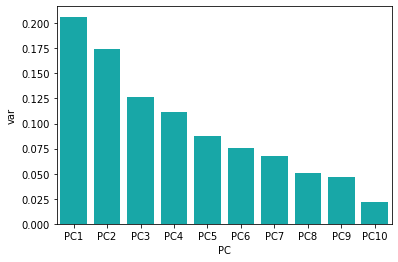

In [73]:
#Plotting the Scree plot
import seaborn as sns
df_pcsp = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4','PC5', 'PC6','PC7','PC8','PC9', 'PC10']})
sns.barplot(x='PC',y="var", 
           data=df_pcsp, color="c");

The original 15 dimensional data can be safely reduced to 10 dimensions using PCA because the dataset can be explained by only ten components.

##  Plotting the data 2 Principal components only 

Text(0, 0.5, 'Second principle component')

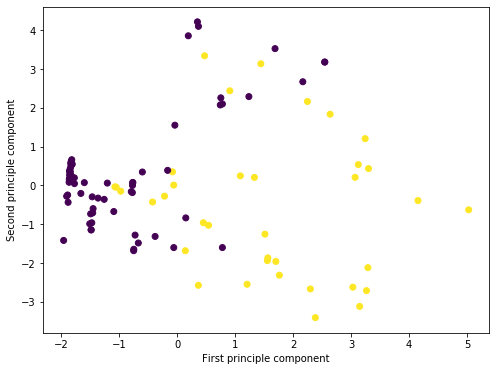

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:,0],df_pca[:,1],c=df['Survived'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

You can see the variation of data for only 2 components are not high. However, when we plot the data into 2 Principal Component, we can see some seperation based on survival and non survival. So we can clearly see 2 clusters for first 2 PC. 